<a href="https://colab.research.google.com/github/VaideswarReddy/Credit_card_default_prediction/blob/main/Vaideswar_Reddy_Team_3_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Copy of default of credit card clients.xls',header = 1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df = df.rename(columns={'LIMIT_BAL':'credit_limit','SEX':'gender','PAY_0':'pp_sep','PAY_2':'pp_aug','PAY_3':'pp_july','PAY_4':'pp_june','PAY_5':'pp_may','PAY_6':'pp_april','BILL_AMT1':'sep_bill','BILL_AMT2':'aug_bill','BILL_AMT3':'july_bill','BILL_AMT4':'june_bill','BILL_AMT5':'may_bill','BILL_AMT6':'april_bill','PAY_AMT1':'sep_paid_amt','PAY_AMT2':'aug_paid_amt','PAY_AMT3':'july_paid_amt','PAY_AMT4':'june_paid_amt','PAY_AMT5':'may_paid_amt','PAY_AMT6':'april_paid_amt'})

In [6]:
df.head()

,ID,credit_limit,gender,EDUCATION,MARRIAGE,AGE,pp_sep,pp_aug,pp_july,pp_june,pp_may,pp_april,sep_bill,aug_bill,july_bill,june_bill,may_bill,april_bill,sep_paid_amt,aug_paid_amt,july_paid_amt,june_paid_amt,may_paid_amt,april_paid_amt,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.credit_limit.value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: credit_limit, Length: 81, dtype: int64

In [ ]:
df.gender.value_counts()

2    18112
1    11888
Name: gender, dtype: int64

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [ ]:
df.pp_sep.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pp_sep, dtype: int64

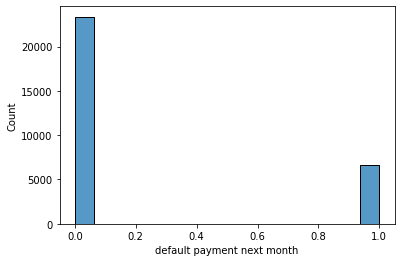

In [ ]:
sns.histplot(df['default payment next month'])

(array([2.7590e+03, 5.6860e+03, 1.4737e+04, 3.6880e+03, 2.6670e+03,
        3.2200e+02, 7.6000e+01, 2.6000e+01, 1.1000e+01, 2.8000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

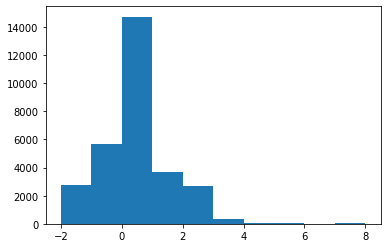

In [ ]:
plt.hist(df.pp_sep)

(array([3.782e+03, 6.050e+03, 1.573e+04, 2.800e+01, 3.927e+03, 3.260e+02,
        9.900e+01, 2.500e+01, 1.200e+01, 2.100e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

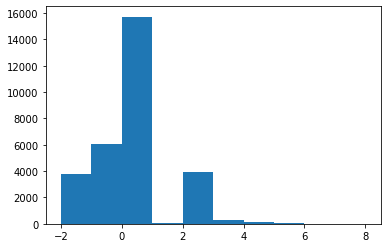

In [ ]:
plt.hist(df.pp_aug)

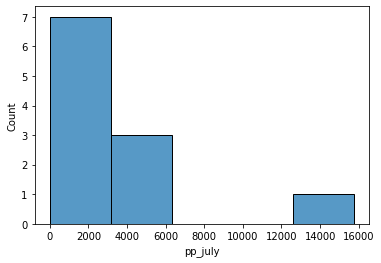

In [ ]:
sns.histplot(df.pp_july.value_counts())

(array([4.0850e+03, 5.9380e+03, 1.5764e+04, 4.0000e+00, 3.8190e+03,
        2.4000e+02, 7.6000e+01, 2.1000e+01, 2.3000e+01, 3.0000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

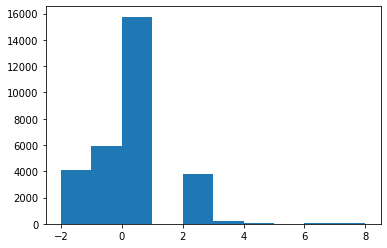

In [ ]:
plt.hist(df.pp_july)

(array([4.3480e+03, 5.6870e+03, 1.6455e+04, 2.0000e+00, 3.1590e+03,
        1.8000e+02, 6.9000e+01, 3.5000e+01, 5.0000e+00, 6.0000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

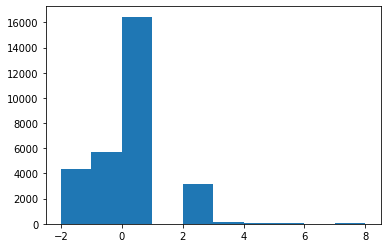

In [ ]:
plt.hist(df.pp_june)

(array([4.5460e+03, 5.5390e+03, 1.6947e+04, 0.0000e+00, 2.6260e+03,
        1.7800e+02, 8.4000e+01, 1.7000e+01, 4.0000e+00, 5.9000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

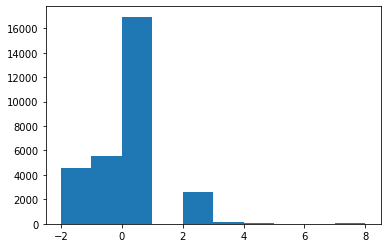

In [ ]:
plt.hist(df.pp_may)

(array([4.8950e+03, 5.7400e+03, 1.6286e+04, 0.0000e+00, 2.7660e+03,
        1.8400e+02, 4.9000e+01, 1.3000e+01, 1.9000e+01, 4.8000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

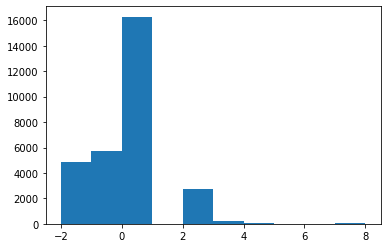

In [ ]:
plt.hist(df.pp_april)

In [ ]:
df.sep_bill.value_counts()

0        2008
390       244
780        76
326        72
316        63
         ... 
12466       1
98874       1
2619        1
14909       1
44984       1
Name: sep_bill, Length: 22723, dtype: int64

In [ ]:
df.sep_paid_amt.value_counts()

0        5249
2000     1363
3000      891
5000      698
1500      507
         ... 
24125       1
20031       1
9019        1
11066       1
10850       1
Name: sep_paid_amt, Length: 7943, dtype: int64

In [ ]:
sum(df.sep_bill)

1536699927

In [ ]:
sum(df.sep_paid_amt)

169907415

In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

<BarContainer object of 30000 artists>

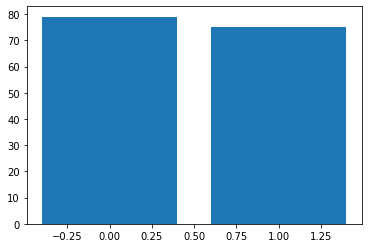

In [ ]:
plt.bar(df['default payment next month'],df.AGE)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   credit_limit                30000 non-null  int64
 2   gender                      30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   pp_sep                      30000 non-null  int64
 7   pp_aug                      30000 non-null  int64
 8   pp_july                     30000 non-null  int64
 9   pp_june                     30000 non-null  int64
 10  pp_may                      30000 non-null  int64
 11  pp_april                    30000 non-null  int64
 12  sep_bill                    30000 non-null  int64
 13  aug_bill                    30000 non-null  int64
 14  july_b

In [ ]:
df.columns

Index(['ID', 'credit_limit', 'gender', 'EDUCATION', 'MARRIAGE', 'AGE',
       'pp_sep', 'pp_aug', 'pp_july', 'pp_june', 'pp_may', 'pp_april',
       'sep_bill', 'aug_bill', 'july_bill', 'june_bill', 'may_bill',
       'april_bill', 'sep_paid_amt', 'aug_paid_amt', 'july_paid_amt',
       'june_paid_amt', 'may_paid_amt', 'april_paid_amt',
       'default payment next month'],
      dtype='object')

In [ ]:
df1 = df[df['default payment next month']==1]

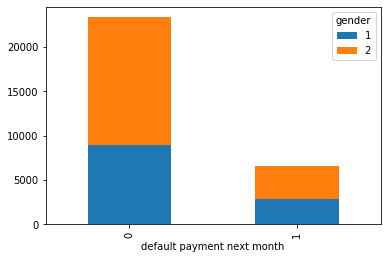

In [ ]:
df.groupby(['default payment next month', 'gender']).size().unstack().plot(kind='bar', stacked=True)

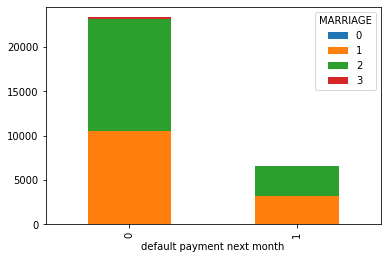

In [ ]:
df.groupby(['default payment next month', 'MARRIAGE']).size().unstack().plot(kind='bar', stacked=True)

<Figure size 720x576 with 0 Axes>

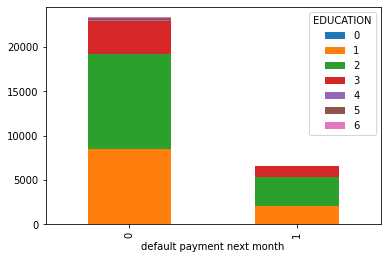

<Figure size 720x576 with 0 Axes>

In [ ]:
df.groupby(['default payment next month', 'EDUCATION']).size().unstack().plot(kind='bar', stacked=True)

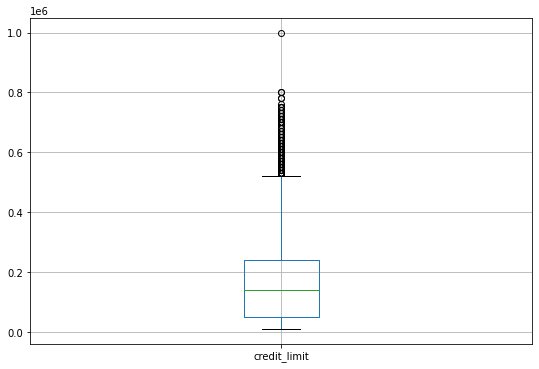

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'credit_limit',)
plt.show()

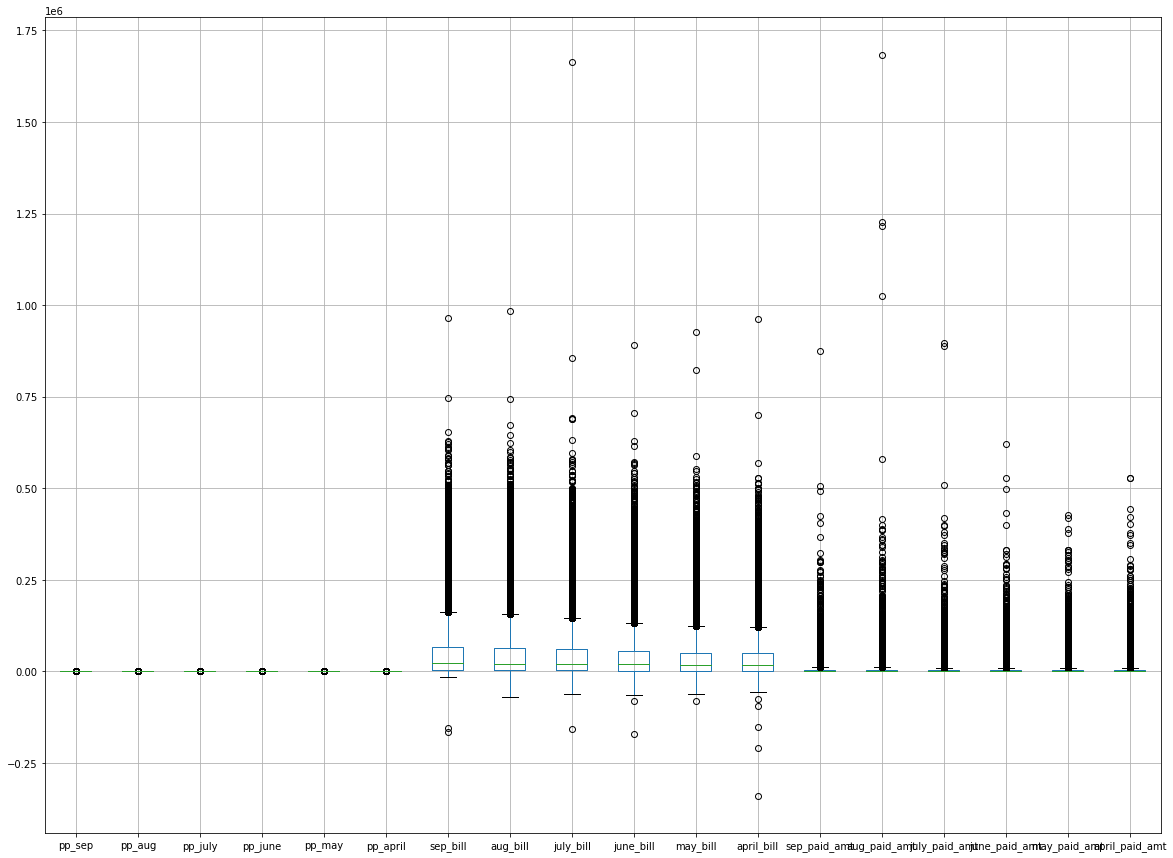

In [ ]:
fig = plt.figure(figsize=(20, 15))
ax = fig.gca()
df.boxplot(column = ['pp_sep','pp_aug', 'pp_july', 'pp_june', 'pp_may', 'pp_april',
       'sep_bill', 'aug_bill', 'july_bill', 'june_bill', 'may_bill',
       'april_bill', 'sep_paid_amt', 'aug_paid_amt', 'july_paid_amt',
       'june_paid_amt', 'may_paid_amt', 'april_paid_amt'])
plt.show()

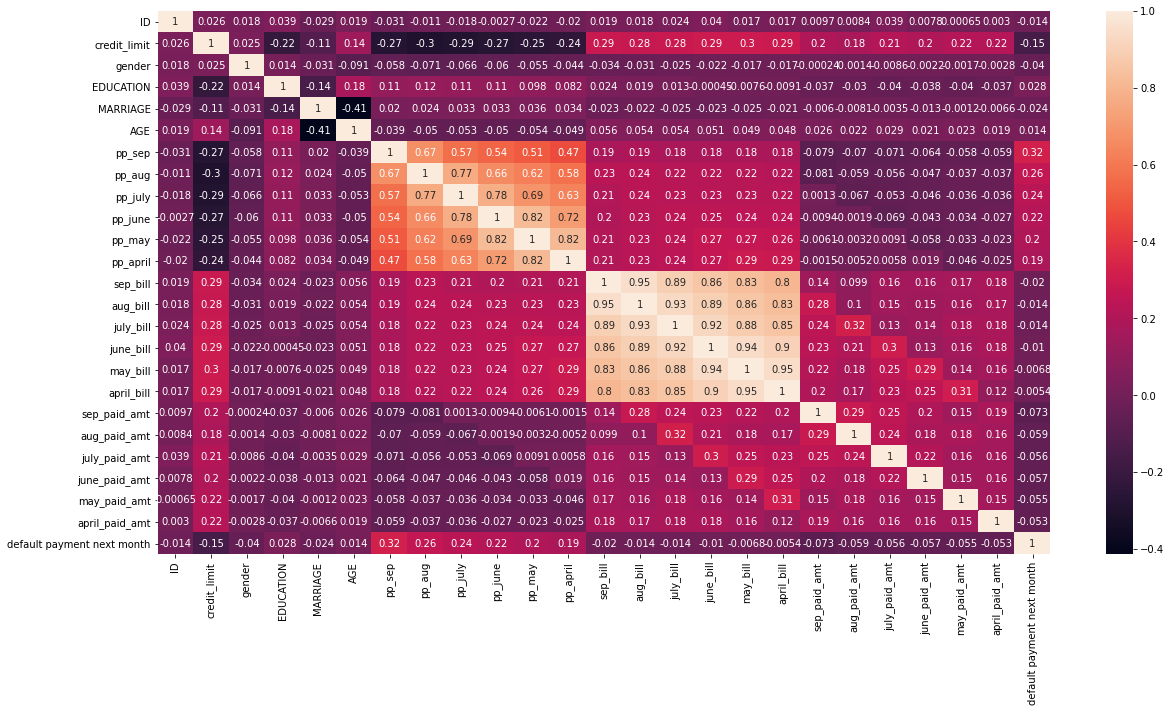

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
X = df.drop('default payment next month',axis=1)
y = df['default payment next month']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(24000, 24)
(6000, 24)


In [ ]:
y_train.value_counts()

0    18661
1     5339
Name: default payment next month, dtype: int64

In [ ]:
y_test.value_counts()

0    4703
1    1297
Name: default payment next month, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[-1.05438378e-05, -2.85166463e-06, -9.42068020e-04,
        -1.05789065e-03, -1.02786072e-03, -1.28352999e-02,
         2.44773518e-03,  1.95419715e-03,  1.71691166e-03,
         1.54461165e-03,  1.39983862e-03,  1.31000711e-03,
        -1.03101306e-05,  5.26834014e-06,  3.23369139e-06,
         2.50117215e-06,  2.44251273e-06,  1.68937500e-06,
        -3.34862133e-05, -2.05448399e-05, -8.60294116e-06,
        -8.81381540e-06, -3.00983139e-06, -3.40885435e-06]])

In [ ]:
clf.intercept_

array([-0.00048396])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7774583333333334
The accuracy on test data is  0.784


*** Train Accuracy *** 0.7774583333333334


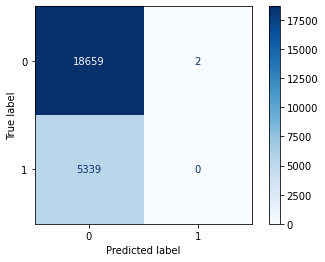

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('*** Train Accuracy ***',clf.score(X_train,y_train))
disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

*** Test Accuracy *** 0.784


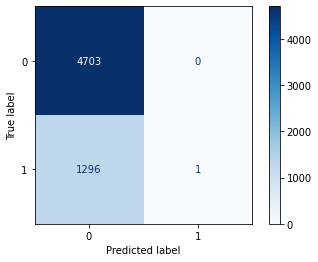

In [ ]:
print('*** Test Accuracy ***',clf.score(X_test,y_test))
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

# SMOTE

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (24000, 24)
Number transactions y_train dataset:  (24000,)
Number transactions X_test dataset:  (6000, 24)
Number transactions y_test dataset:  (6000,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 5339
Before OverSampling, counts of label '0': 18661 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (37322, 24)
After OverSampling, the shape of train_y: (37322,) 

After OverSampling, counts of label '1': 18661
After OverSampling, counts of label '0': 18661


In [ ]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train_res)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train_res)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6251808584748941
The accuracy on test data is  0.5493333333333333


*** Train Accuracy *** 0.6251808584748941


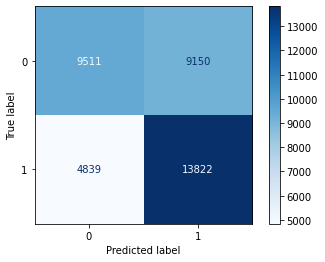

In [ ]:
print('*** Train Accuracy ***',clf.score(X_train_res,y_train_res))
disp = plot_confusion_matrix(clf, X_train_res, y_train_res,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

# Using Different Dataset

In [73]:
df1 = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Copy of default of credit card clients.xls',header = 1)

In [12]:
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
df1['total_bill_amnt'] = df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6']
df1['total_paid_amnt'] = df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6']
df1['difference_due_amnt'] = df1['total_bill_amnt']-df1['total_paid_amnt']

In [14]:
df1['total_delay'] = df1['PAY_0']+df1['PAY_2']+df1['PAY_3']+df1['PAY_4']+df1['PAY_5']+df1['PAY_6']

In [14]:
df1.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,total_bill_amnt,total_paid_amnt,difference_due_amnt,total_delay
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,-2
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,3
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018,90635,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388,222946,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049,50290,-2
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,238114,7772,230342,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,2724595,180759,2543836,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,13486,4791,8695,-3
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,65212,6761,58451,2
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,26919,14129,12790,-10


In [74]:
 df1['EDUCATION']=np.where(df1['EDUCATION'] == 6, 4, df1['EDUCATION'])
df1['EDUCATION']=np.where(df1['EDUCATION'] == 0, 4, df1['EDUCATION'])
df1['MARRIAGE']=np.where(df1['MARRIAGE'] == 0, 3, df1['MARRIAGE'])

In [19]:
.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [20]:
df1 = pd.get_dummies(df1,columns=['EDUCATION','MARRIAGE'])

In [22]:
df1.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,total_bill_amnt,total_paid_amnt,difference_due_amnt,total_delay,EDUCATION_5,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,-2,0,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,3,0,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018,90635,0,0,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388,222946,0,0,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049,50290,-2,0,0,0,0,1,1,0,0


In [23]:
df1 = pd.get_dummies(df1, columns = ['PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6'], drop_first = True )

In [24]:
df1.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,total_bill_amnt,total_paid_amnt,difference_due_amnt,total_delay,EDUCATION_5,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,...,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,-2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,3,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018,90635,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388,222946,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049,50290,-2,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df1 = df1.replace(encoders_nums)

# Logistic Regression

In [26]:
X = df1.drop('default payment next month',axis=1)
y = df1['default payment next month']

In [28]:
 from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(24000, 86)
(6000, 86)


In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
clf.coef_

array([[ 0.00319738, -0.23155493,  0.08790369,  0.04071584, -0.20146195,
         0.14287906,  0.19866592,  0.03613618, -0.0286782 , -0.04556954,
        -0.21556583, -0.16752669,  0.01377614, -0.00231193,  0.02439782,
        -0.02749544,  0.01838717, -0.1206711 ,  0.03942906,  0.12813059,
        -0.13533453,  0.01813116, -0.01765616, -0.05915225,  0.031172  ,
         0.04786577, -0.00082706, -0.04758823,  0.17546029, -0.15875939,
         0.23925979,  0.53331917,  0.18449161,  0.08029728,  0.03656964,
        -0.00749961,  0.03627863, -0.13900833, -0.08710519,  0.01382541,
        -0.02926758, -0.00448384, -0.02439897, -0.05685906,  0.03252912,
         0.00615688, -0.03452955,  0.00722696, -0.00863639,  0.01881795,
        -0.06925918,  0.11444381,  0.04096803, -0.00215574, -0.02264551,
         0.21520307,  0.0093951 , -0.10703225, -0.07301705, -0.07777109,
        -0.00887286,  0.01865573, -0.01031244, -0.00139118, -0.03191274,
        -0.05972912, -0.06188483, -0.10989377, -0.0

In [33]:
clf.intercept_

array([-1.48241142])

In [34]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [37]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8207083333333334
The accuracy on test data is  0.8256666666666667


*** Train Accuracy *** 0.8207083333333334


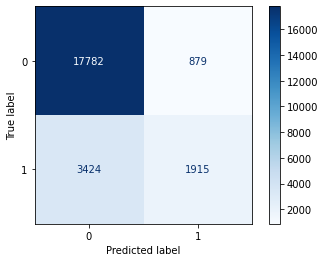

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print('*** Train Accuracy ***',clf.score(X_train,y_train))
disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

*** Test Accuracy *** 0.8256666666666667


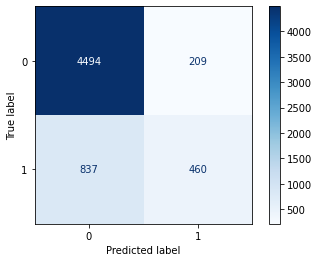

In [41]:
print('*** Test Accuracy ***',clf.score(X_test,y_test))
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

In [42]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_train, train_class_preds,target_names=['class_0','class_1']))

              precision    recall  f1-score   support

     class_0       0.84      0.95      0.89     18661
     class_1       0.69      0.36      0.47      5339

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.68     24000
weighted avg       0.80      0.82      0.80     24000



In [49]:
print(classification_report(y_test, test_class_preds,target_names=['class_0','class_1']))

              precision    recall  f1-score   support

     class_0       0.84      0.96      0.90      4703
     class_1       0.69      0.35      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.83      0.80      6000



# Naive Bayes

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)

In [64]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB().fit(X_train,y_train)

In [65]:
train_preds = naive_model.predict(X_train)
test_preds = naive_model.predict(X_test)

In [66]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_preds))
print(confusion_matrix(y_test,test_preds))

[[18355   340]
 [ 4688   617]]
[[4567  102]
 [1198  133]]


*** Train Accuracy *** 0.7905


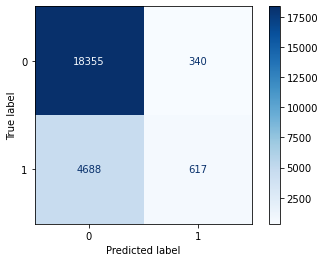

In [70]:
print('*** Train Accuracy ***',naive_model.score(X_train,y_train))
disp = plot_confusion_matrix(naive_model, X_train, y_train,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

*** Test Accuracy *** 0.7833333333333333


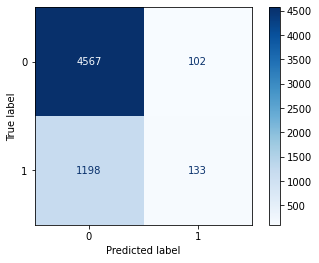

In [71]:
print('*** Test Accuracy ***',naive_model.score(X_test,y_test))
disp = plot_confusion_matrix(naive_model, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                             values_format='g'
                            )

In [67]:
from sklearn.metrics import classification_report

In [68]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7905
The accuracy on test data is  0.7833333333333333


In [69]:
# Print the classification report for train and test
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     18695
           1       0.64      0.12      0.20      5305

    accuracy                           0.79     24000
   macro avg       0.72      0.55      0.54     24000
weighted avg       0.76      0.79      0.73     24000



              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4669
           1       0.57      0.10      0.17      1331

    accuracy                           0.78      6000
   macro avg       0.68      0.54      0.52      6000
weighted avg       0.74      0.78      0.72      6000

